In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import altair as alt
from altair import datum

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [27]:
file = open('../Base_PSO/converge_plot.txt')

t = []
fit_vals = []
my_dict = {}
i = 0
for line in file:
    i+= 1
    aux = line.rstrip('\n').split('/')
    aux = aux[:-1]
    for el in aux:
        numbers = el.split(" ")
        
        t = int(numbers[0])
        fit_val = float(numbers[1])

        try:
            my_dict[t] = np.append(my_dict[t], fit_val)
        except KeyError:
            my_dict[t] = np.array([fit_val])
            

In [28]:
lens = []
means = []
iterations = []
for k,v in my_dict.items():
    lens.append(len(v))
    means.append(np.mean(v))
    iterations.append(k)

In [29]:
file = open('../Base_PSO/converge_plot_compare.txt')
dicts = {1: {}, 2: {}, 3:{}}

t = []
fit_vals = []
for line in file:
    aux = line.rstrip('\n').split('/')
    aux = aux[:-1]
    for el in aux:
        numbers = el.split(" ")

        method = int(numbers[0])
        t = int(numbers[1])
        fit_val = float(numbers[2])
        d = dicts[method]
        try:
            d[t] = np.append(d[t],fit_val)
        except KeyError:
            d[t] = np.array([fit_val])



In [30]:
legend = {1: "vmax", 2: "decreasing_w", 3: "constr_fact"}

In [31]:
pd.DataFrame(columns = legend.values())

,vmax,decreasing_w,constr_fact


In [32]:
out = pd.DataFrame(columns = ["fit_val1", "n_converged1","fit_val2", "n_converged2","fit_val3", "n_converged3"])
for k,v in dicts.items():
    for k1,v1 in v.items():
        name1 = "fit_val"+str(k)
        name2 = "n_converged"+str(k)
        out.loc[k1,name1] = np.mean(v1)
        out.loc[k1, name2] = len(v1)
        #lens.append(len(v1))
        #means.append(np.mean(v1))
        #iterations.append(k1)
out[pd.isnull(out)] = 0
out["iterations"] = out.index

In [33]:
out = out.iloc[0:21]

In [34]:
out["Method1"] = "Method 1: Limiting Velocity at 0.4, "
out["Method3"] = "Method 3: Constriction Factor"
out["Method2"] = "Method 2: Decreasing w"

In [35]:
out.head()

,fit_val1,n_converged1,fit_val2,n_converged2,fit_val3,n_converged3,iterations,Method1,Method3,Method2
0,2.56596,1000,2.55041,1000,2.56927,1000,0,"Method 1: Limiting Velocity at 0.4,",Method 3: Constriction Factor,Method 2: Decreasing w
1,1.25349,1000,1.66879,1000,1.5129,1000,1,"Method 1: Limiting Velocity at 0.4,",Method 3: Constriction Factor,Method 2: Decreasing w
2,0.929776,1000,1.32824,1000,1.0384,1000,2,"Method 1: Limiting Velocity at 0.4,",Method 3: Constriction Factor,Method 2: Decreasing w
3,0.697708,1000,1.11352,1000,0.685027,1000,3,"Method 1: Limiting Velocity at 0.4,",Method 3: Constriction Factor,Method 2: Decreasing w
4,0.577159,1000,0.984314,1000,0.474504,1000,4,"Method 1: Limiting Velocity at 0.4,",Method 3: Constriction Factor,Method 2: Decreasing w


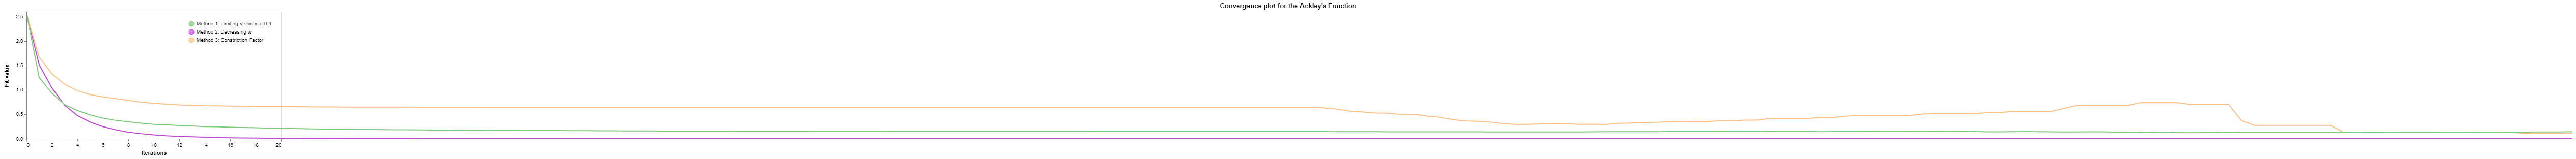

In [86]:
c1 = alt.Chart(out, width = 500, height = 250).mark_line().encode(
    x = alt.X("iterations:Q", title = "Iterations", scale = alt.Scale(domain = [0,20]),axis=alt.Axis(grid=False)),
    y = alt.Y("fit_val3:Q", title = "Fit value",axis=alt.Axis(grid=False)),
    color = alt.Color("Method2:N",
                      legend = alt.Legend(title = "", orient = "top-right",),#symbolType ="square"),
                      scale = alt.Scale(range=["rgb(127,201,127)", "rgb(190,74,212)", "rgb(253,192,134)"])),
).properties(title = "Convergence plot for the Ackley's Function", 
)

c2 = alt.Chart(out).mark_line().encode(
    x = alt.X("iterations:Q", scale = alt.Scale(domain = [0,20])),
    y = alt.Y("fit_val2:Q"),
    color = alt.Color("Method3:N",
                      legend = alt.Legend(title = "")),
)

c3 = alt.Chart(out).mark_line().encode(
    x = alt.X("iterations:Q", scale = alt.Scale(domain = [0,20])),
    y = alt.Y("fit_val1:Q"),
    color = alt.Color("Method1:N",legend = alt.Legend(title = "")),
)
chart = c1+c1.mark_point(filled = True, size = 0) +c2 +c2.mark_point(filled = True, size = 0) +c3+c3.mark_point(filled=True, size = 0)
chart

In [37]:
out = pd.DataFrame(columns = ["fit_val1", "n_converged1","fit_val2", "n_converged2","fit_val3", "n_converged3"])
for k,v in dicts.items():
    for k1,v1 in v.items():
        name1 = "fit_val"+str(k)
        name2 = "n_converged"+str(k)
        out.loc[k1,name1] = np.mean(v1)
        out.loc[k1, name2] = len(v1)
        #lens.append(len(v1))
        #means.append(np.mean(v1))
        #iterations.append(k1)
out[pd.isnull(out)] = 0
out["iterations"] = out.index

In [38]:
out = out.iloc[0:201]
out["Method1"] = "Method 1: Limiting Velocity at 0.4"
out["Method3"] = "Method 3: Constriction Factor"
out["Method2"] = "Method 2: Decreasing w"

In [39]:
out.head()

,fit_val1,n_converged1,fit_val2,n_converged2,fit_val3,n_converged3,iterations,Method1,Method3,Method2
0,2.56596,1000,2.55041,1000,2.56927,1000,0,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
1,1.25349,1000,1.66879,1000,1.5129,1000,1,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
2,0.929776,1000,1.32824,1000,1.0384,1000,2,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
3,0.697708,1000,1.11352,1000,0.685027,1000,3,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
4,0.577159,1000,0.984314,1000,0.474504,1000,4,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w


In [40]:
size = 1000
perc = np.array([0.05,0.5,0.8,0.99])
diff = size*perc
diffs = [str(d)+"_percent" for d in perc]
conv_dict = pd.DataFrame(columns = diffs)

for i in [1,2,3]:
    name = "n_converged"+str(i)
    converged = size-np.array(out[name])
    
    #for num in diff:
    #    conv_dict.loc[legend[i]]
        
    conv = [sum(converged<num) for num in diff]
    for j,col in enumerate(conv_dict.columns):
        conv_dict.loc[legend[i], col] = conv[j]

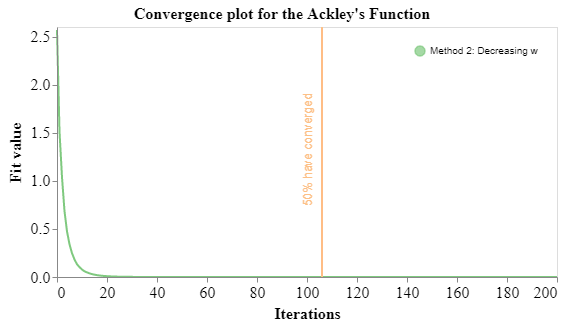

In [94]:
base1 = alt.Chart(out, width = 500, height = 250).mark_line().encode(
    x = alt.X("iterations:Q", axis = alt.Axis(title="Iterations", grid = False), scale = alt.Scale(domain = [0,200])),
    y = alt.Y("fit_val3:Q", axis = alt.Axis(title = "Fit value", grid = False)),
    color = alt.Color("Method2:N",
                      legend = alt.Legend(title = "", orient = "top-right",),#symbolType ="square"),
                      scale = alt.Scale(range=["rgb(127,201,127)", "rgb(253,192,134)","rgb(190,74,212)"])),
).properties(title = "Convergence plot for the Ackley's Function", 
)

v1 = alt.Chart().mark_rule().encode(
    x = "a:Q",
    color = alt.value("rgb(253,192,134)"),
    opacity = alt.value(0.2)
)

t1 = alt.Chart(out).mark_text(align='left', fontSize=12,
                              text='50% have converged', angle = 270, dx = 67, dy = 5).encode(
    x = alt.X("mean(iterations):Q", title = "Iterations", scale = alt.Scale(domain = [0,200]),axis=alt.Axis(grid=False)),
    y = alt.Y("mean(fit_val3):Q", title = "Fit value",axis=alt.Axis(grid=False)),
    color = alt.value("rgb(253,192,134)"),
)

c1 = alt.layer(
    base1,base1.mark_point(filled=True, size = 0),t1,v1,
    data=out
).transform_calculate(
    a=str(conv_dict.loc["decreasing_w", "0.5_percent"]),
    b=str(conv_dict.loc["vmax", "0.8_percent"])
).configure_title(fontSize=16, font = "serif"
).configure_axis(labelFontSize=16, labelFont = "serif", titleFont = "serif",
titleFontSize=16)
c1

In [95]:
conv_dict

,0.05_percent,0.5_percent,0.8_percent,0.99_percent
vmax,103.0,117.0,138.0,201.0
decreasing_w,102.0,106.0,111.0,156.0
constr_fact,181.0,193.0,199.0,201.0


In [96]:
out.head()

,fit_val1,n_converged1,fit_val2,n_converged2,fit_val3,n_converged3,iterations,Method1,Method3,Method2
0,2.56596,1000,2.55041,1000,2.56927,1000,0,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
1,1.25349,1000,1.66879,1000,1.5129,1000,1,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
2,0.929776,1000,1.32824,1000,1.0384,1000,2,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
3,0.697708,1000,1.11352,1000,0.685027,1000,3,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w
4,0.577159,1000,0.984314,1000,0.474504,1000,4,Method 1: Limiting Velocity at 0.4,Method 3: Constriction Factor,Method 2: Decreasing w


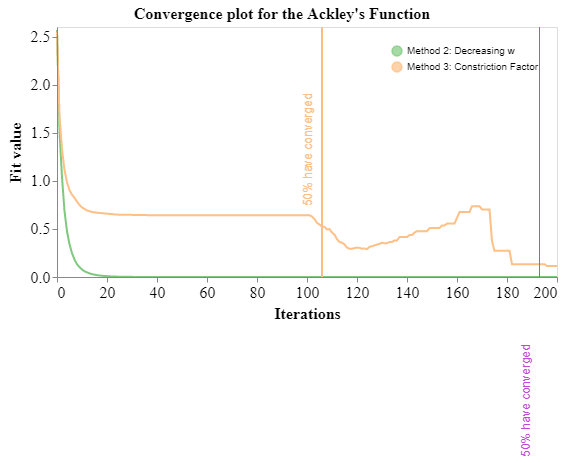

In [110]:
base2 = alt.Chart(out).mark_line().encode(
    x = alt.X("iterations:Q", scale = alt.Scale(domain = [0,200])),
    y = alt.Y("fit_val2:Q"),
    color = alt.Color("Method3:N",
                      legend = alt.Legend(title = "")),
)

v2 = alt.Chart().mark_rule().encode(
    x = "a:Q",
    color = alt.value("rgb(190,74,212)"),
)

t2 = alt.Chart(out).mark_text(align='left', fontSize=12,
                              text='50% have converged', angle = 270, dx = -180, dy = -27).encode(
    x = "max(iterations):Q",
    y = "mean(fit_value2):Q",
    color = alt.value("rgb(190,74,212)"),
)

c2 = alt.layer(
    base2,base2.mark_point(filled=True, size = 0),t2,v2,
    data=out
).transform_calculate(
    a=str(conv_dict.loc["constr_fact", "0.5_percent"]),
)
c1+c2

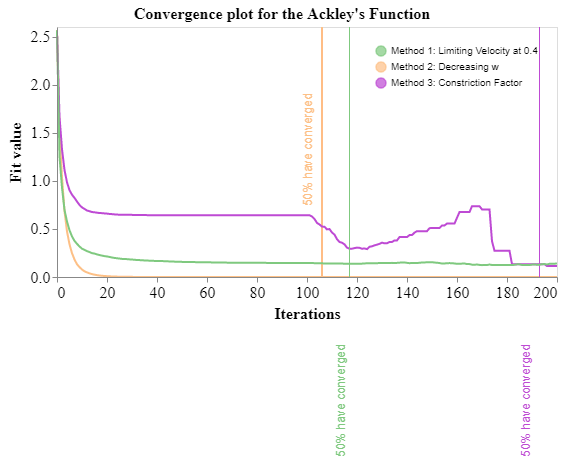

In [111]:
base3 = alt.Chart(out).mark_line().encode(
    x = alt.X("iterations:Q", scale = alt.Scale(domain = [0,200])),
    y = alt.Y("fit_val1:Q"),
    color = alt.Color("Method1:N",legend = alt.Legend(title = "")),
)

v3 = alt.Chart().mark_rule().encode(
    x = "a:Q",
    color = alt.value("rgb(127,201,127)"),
)

t3 = alt.Chart(out).mark_text(align='left', fontSize=12, 
                              text='50% have converged', angle = 270, dx = -180, dy = -212).encode(
    x = "max(iterations):Q",
    y = "mean(fit_value2):Q",
    color = alt.value("rgb(127,201,127)"),
)

c3 = alt.layer(
    base3,base3.mark_point(filled=True, size = 0),t3,v3,
    data=out
).transform_calculate(
    a=str(conv_dict.loc["vmax", "0.5_percent"]),
)
chart = c1+c2+c3

chart.save("images/converge_plots.png")
chart

In [69]:
conv_dict

,0.05_percent,0.5_percent,0.8_percent,0.99_percent
vmax,103.0,117.0,138.0,201.0
decreasing_w,102.0,106.0,111.0,156.0
constr_fact,181.0,193.0,199.0,201.0


In [62]:
conv_dict

,0.05_percent,0.5_percent,0.8_percent,0.99_percent
vmax,103.0,117.0,138.0,201.0
decreasing_w,102.0,106.0,111.0,156.0
constr_fact,181.0,193.0,199.0,201.0


In [63]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 1")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-2, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

NameError: name 'split' is not defined

<Figure size 720x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 2")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-5, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

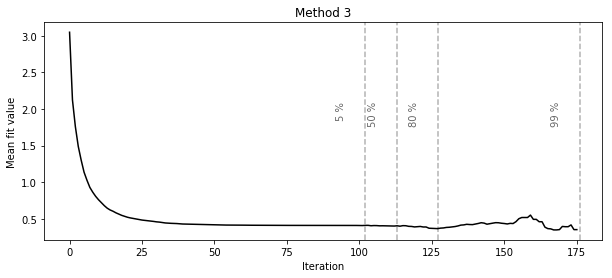

In [8]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 3")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-10, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

In [2]:
file = open('../Base_PSO/simpler_version2.txt')

In [3]:
i = 0
for line in file:
    i+=1
    if i == 2:
        print(line)
    if i ==3:
        print(line)

4 0.800000 125 0.183520 0.000000/4 0.800000 146 0.072586 0.000000/4 0.800000 108 0.100496 0.000000/4 0.800000 106 0.678621 0.000000/4 0.800000 112 1.670662 0.000000/4 0.800000 111 0.203499 0.000000/4 0.800000 114 0.403799 0.000000/4 0.800000 111 0.830227 0.000000/4 0.800000 116 1.271955 0.000000/4 0.800000 109 0.729533 0.000000/4 0.800000 114 0.179205 0.000000/4 0.800000 141 1.085226 0.000000/4 0.800000 145 0.094992 0.000000/4 0.800000 102 0.936137 0.000000/4 0.800000 140 0.876844 0.000000/4 0.800000 119 0.098593 0.000000/4 0.800000 106 1.282954 0.000000/4 0.800000 131 1.479294 0.000000/4 0.800000 104 0.473165 0.000000/4 0.800000 117 0.908666 0.000000/4 0.800000 100 2.586048 0.000000/4 0.800000 139 1.523201 0.000000/4 0.800000 100 2.603286 0.000000/4 0.800000 122 1.993608 0.000000/4 0.800000 104 0.066059 0.000000/4 0.800000 163 0.381612 0.000000/4 0.800000 123 0.092891 0.000000/4 0.800000 113 0.929127 0.000000/4 0.800000 116 0.809284 0.000000/4 0.800000 135 0.348633 0.000000/4 0.800000

In [4]:
import matplotlib.pyplot as plt
#from labellines import labelLine, labelLines

file = open('../Base_PSO/simpler_version.txt')

pop_size = []
v_fraction = []
mean_iterations = []
mean_fit = []
mean_time = []

for line in file:
    aux = line.rstrip('\n').split('/')
    aux = aux[:-1]
    iterations = []
    fit = []
    time = []

    for iter in aux:
        value = iter.split(' ')
        iterations.append(int(value[2]))
        fit.append(float(value[3]))
        time.append(float(value[4]))

    aux2 = aux[0].split(' ')
    pop_size.append(int(aux2[0]))
    v_fraction.append(float(aux2[1]))
    mean_iterations.append(sum(iterations)/len(iterations))
    mean_fit.append(sum(fit)/len(fit))
    mean_time.append(sum(time)/len(time))

v_fraction_list = []
pop_size_list = []
mean_iterations_list = []
mean_fit_list = []
mean_time_list = []

for i in range(4):
    line1 = []
    line2 = []
    line3 = []
    line4 = []
    line5 = []
    for j in range(5):
        line1.append(pop_size[i * 5 + j])
        line2.append(mean_iterations[i * 5 + j])
        line3.append(mean_fit[i * 5 + j])
        line4.append(mean_time[i * 5 + j])
        line5.append(v_fraction[i * 5 + j])
    pop_size_list.append(line1)
    mean_iterations_list.append(line2)
    mean_fit_list.append(line3)
    mean_time_list.append(line4)
    v_fraction_list.append(line5)

In [5]:
out = pd.DataFrame()
out["vmax"]=v_fraction
out["iter"]=mean_iterations
out["fit_val"]=mean_fit
out["pop_size"]=pop_size

In [6]:
out.head()

,vmax,iter,fit_val,pop_size
0,0.9,116.943,0.829865,4
1,0.8,118.509,0.820934,4
2,0.7,120.319,0.712632,4
3,0.6,122.966,0.655987,4
4,0.5,126.261,0.535017,4


In [7]:
max_fit = round(max(out["fit_val"]), 2)
max_iter = max(out["iter"])+10

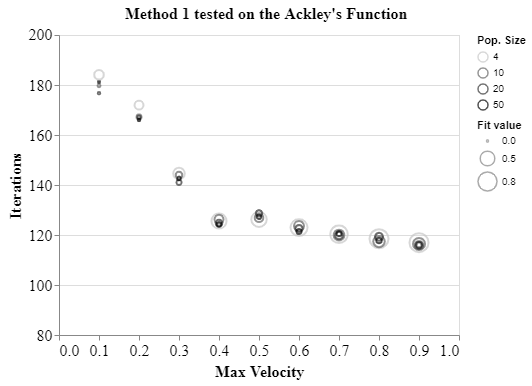

In [26]:
c = alt.Chart(out).mark_point(
    ).encode(
        x = alt.X("vmax", axis = alt.Axis(title = "Max Velocity"), scale = alt.Scale(domain=[0,1])),
        y = alt.Y("iter:Q", axis = alt.Axis(title = "Iterations"), scale=alt.Scale(domain=[80, max_iter])),
        color = alt.Color("pop_size:N",
                          legend = alt.Legend(title = "Pop. Size"),#values = [4,10,20,50],type = "symbol", title = "Pop. Size"),
                          scale = alt.Scale(range = ["rgb(200,200,200)","rgb(100,100,100)", "rgb(50,50,50)", "rgb(0,0,0)"])
                         ),
        size = alt.Size("fit_val:Q",
                        legend = alt.Legend(values = [0.01,0.5,max_fit], title = "Fit value"))
    ).properties(title = "Method 1 tested on the Ackley's Function", 
    ).configure_axisBottom(grid = False
    ).configure_title(fontSize=16, font = "serif"
    ).configure_axis(labelFontSize=16, labelFont = "serif", titleFont = "serif",
    titleFontSize=16)
c.save("images/chart_1.png")
c

In [275]:
c = alt.Chart(out).mark_point(
    ).encode(
        x = alt.X("vmax", title = "Max Velocity", scale = alt.Scale(domain=[0,1])),
        y = alt.Y("iter:Q", title = "Iterations", scale=alt.Scale(domain=[80, max_iter])),
        color = alt.Color("pop_size:N",
                          legend = alt.Legend(title = "Pop. Size"),#values = [4,10,20,50],type = "symbol", title = "Pop. Size"),
                          scale = alt.Scale(range = ["rgb(200,200,200)","rgb(100,100,100)", "rgb(50,50,50)", "rgb(0,0,0)"])
                         ),
        size = alt.Size("fit_val:Q",
                        legend = alt.Legend(values = [0.01,0.5,max_fit], title = "Fit value"))
    ).properties(title = "Ackley's Function", 
    ).configure_axisBottom(grid = False)

c.save("images/chart_1.png")
c

KeyboardInterrupt: 